1. data acquisition
2. data cleaning
3. split data into test data and training data
4. build and train model
5. model testing

Labels - true value<br>
Features - data points used in model (predictors)

Review: Accuracy, Precision, Recall, F1-Score and Confussion matrix

In [2]:
!pip install scikit-learn
!pip install numpy

In [3]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
x, y = np.arange(10).reshape((5, 2)), list(range(5))

In [7]:
print(x)
print(y)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(x_train)
print(x_test)

[[2 3]
 [0 1]
 [8 9]]
[[4 5]
 [6 7]]


In [10]:
import pandas as pd

In [12]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [13]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [16]:
df.isnull().sum() # if there was a >0 value then missing data!

label      0
message    0
length     0
punct      0
dtype: int64

In [17]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [18]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

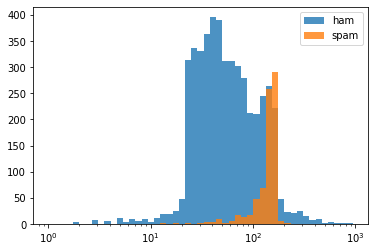

In [19]:
import matplotlib.pyplot as plt

plt.xscale("log")
bins = 1.15 ** (np.arange(0, 50))
plt.hist(df[df['label']=='ham']['length'], bins = bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

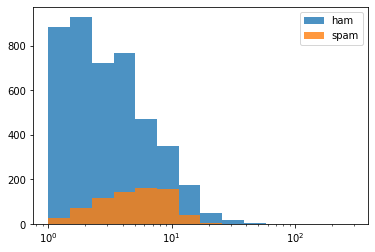

In [21]:
plt.xscale("log")
bins = 1.5 ** (np.arange(0, 15))
plt.hist(df[df['label']=='ham']['punct'], bins = bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [35]:
# model based only on length of string and punctuation count
X = df[['length', 'punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # randomly splits

In [40]:
# can choose model here
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
from sklearn import metrics

pred = lr_model.predict(X_test)
# compare pred with y_test
df2 = pd.DataFrame(metrics.confusion_matrix(y_test, pred), index=['ham', 'spam'], columns = ['ham','spam'])
print(df2)
#only classify a small number of spam correctly

       ham  spam
ham   1412    41
spam   214     5


In [42]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1453
        spam       0.11      0.02      0.04       219

    accuracy                           0.85      1672
   macro avg       0.49      0.50      0.48      1672
weighted avg       0.77      0.85      0.80      1672



TEXT FEATURE EXTRACTION
- methods such as Count Vectorizer, Term Frequency and Inverse Document Frequency
- TF-IDF allows you to understand the context of words across an entire corpus of documents

In [51]:
df3 = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [52]:
df3.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [55]:
df3['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X = df3['message']
y = df3['label']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
count_vect = CountVectorizer()

# fit vectorizer to the data (build a vocab, count no of words...)
#count_vect.fit(X_train)
# transform the original text messages --> vector
#x_train_counts = count_vect.transform(x_train)

X_train_counts = count_vect.fit_transform(X_train) # does the above two in one

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train) # does the CountVectorizer and the tfidf all at once

In [63]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

LinearSVC()

In [68]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf',TfidfVectorizer()), ('clf', LinearSVC())]) # allows us to do all the above at once

text_clf.fit(X_train, y_train) # just pass in raw training data (not the train_counts etc)

pred = text_clf.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1431    6]
 [  22  213]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1437
        spam       0.97      0.91      0.94       235

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [70]:
text_clf.predict(["You just won a free iPhone!"])

array(['spam'], dtype=object)

In [71]:
text_clf.predict(["I just won the lottery"])

array(['ham'], dtype=object)

In [92]:
text_clf.predict(["Winner winner chicken dinner"])

array(['ham'], dtype=object)

Text classification example

In [102]:
df4 = pd.read_csv("moviereviews.tsv", sep='\t')

In [105]:
df4.isnull().sum() # can see some are empty

label      0
review    35
dtype: int64

In [107]:
df4.dropna(inplace=True)
df4.isnull().sum()

label     0
review    0
dtype: int64

In [109]:
blanks = []
for i, lb, rv in df4.itertuples():
    if rv.isspace(): # test if the string is just whitespace
        blanks.append(i)
print(len(blanks)) # can see that some are empty strings
df4.drop(blanks, inplace=True)

27


In [116]:
X_train, X_test, y_train, y_test = train_test_split(df4['review'], df4['label'], test_size=0.3)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [117]:
pred = text_clf.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[259  43]
 [ 41 239]]
              precision    recall  f1-score   support

         neg       0.86      0.86      0.86       302
         pos       0.85      0.85      0.85       280

    accuracy                           0.86       582
   macro avg       0.86      0.86      0.86       582
weighted avg       0.86      0.86      0.86       582



In [128]:
text_clf.predict(["The movie was amazing"])

array(['neg'], dtype=object)